In [4]:
import episcanpy as epi
import anndata as ad
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=250,
                     frameon=True, vector_friendly=True,
                     color_map="YlGnBu", format='pdf', transparent=False,
                     ipython_format='png2x')

In [5]:
DATADIR = ''

# Load 10x data

In [182]:
input_file_10x = 'atac_pbmc_10k_nextgem_fragments_merged_peaks_for_integration_greenleaf__outter_all_chrom.h5ad'
adata = ad.read(DATADIR+input_file_10x)
adata.var_names_make_unique()
adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 513924 × 618749

In [183]:
np.max(adata.X)

24.0

In [184]:
epi.pp.binarize(adata)
np.max(adata.X)

1.0

In [185]:
epi.pp.filter_cells(adata, min_features=100)
adata

AnnData object with n_obs × n_vars = 33643 × 618749
    obs: 'nb_features'

In [186]:
epi.pp.filter_features(adata, min_cells=10)
adata

AnnData object with n_obs × n_vars = 33643 × 596928
    obs: 'nb_features'
    var: 'n_cells'

In [187]:
adata.obs['log_nb_features'] = [np.log10(x) for x in adata.obs['nb_features']]
adata

AnnData object with n_obs × n_vars = 33643 × 596928
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells'

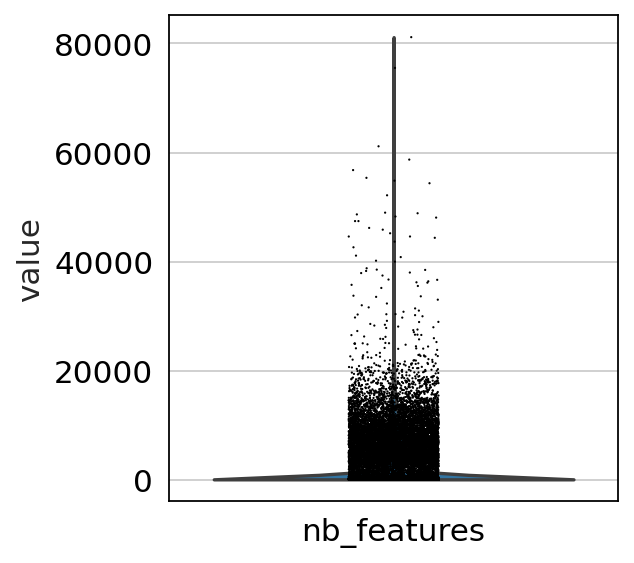

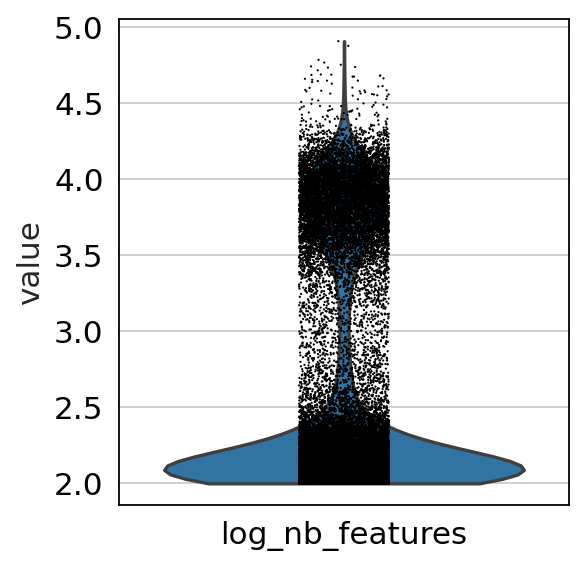

In [188]:
epi.pl.violin(adata, ['nb_features'])
epi.pl.violin(adata, ['log_nb_features'])

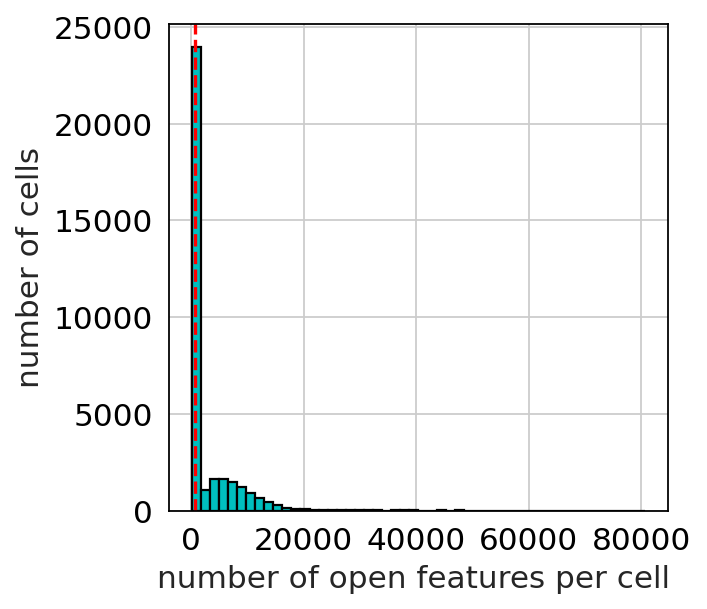

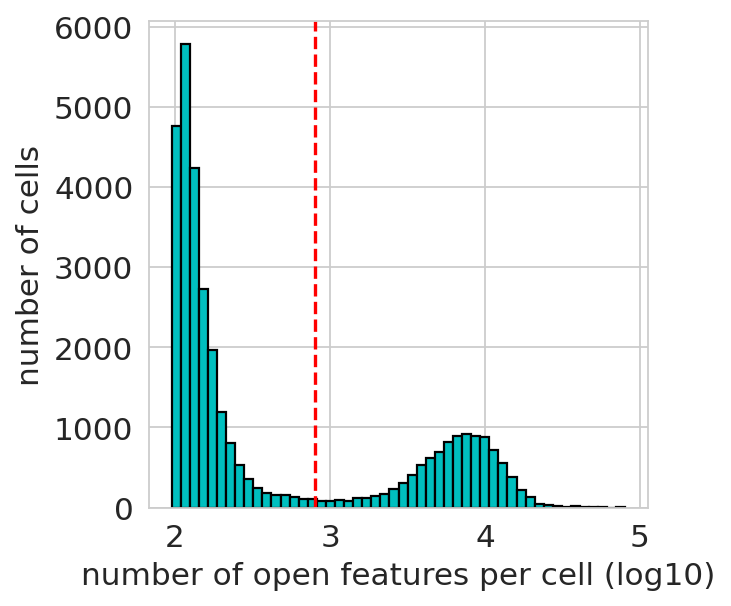

In [189]:
# set a minimum number of cells to keep 
min_features = 800

epi.pp.coverage_cells(adata, binary=True, log=False, bins=50,
               threshold=min_features, save='10x_coverage_cells_for_bbknn_integration.png')
epi.pp.coverage_cells(adata, binary=True, log=10, bins=50,
               threshold=min_features, save='10x_coverage_cells_log10_for_bbknn_integration.png')

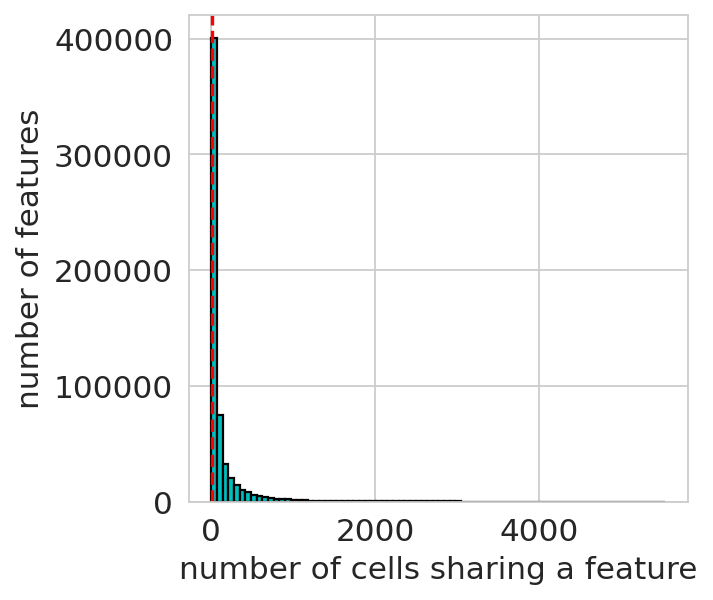

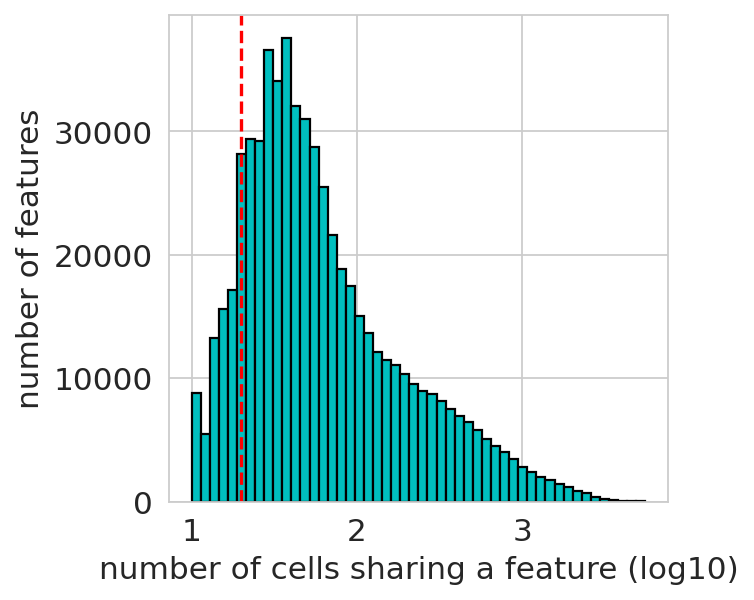

In [190]:
# minimum number of cells sharing a feature
min_cells = 20
epi.pp.coverage_features(adata, binary=True, log=False, 
                        threshold=min_cells, save='10x_feature_coverage_for_bbknn_integration.png')
epi.pp.coverage_features(adata, binary=True, log=True, 
                        threshold=min_cells, save='10x_feature_coverage_log10_for_bbknn_integration.png')

In [191]:
epi.pp.filter_cells(adata, min_features=min_features)
adata

AnnData object with n_obs × n_vars = 10234 × 596928
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness'

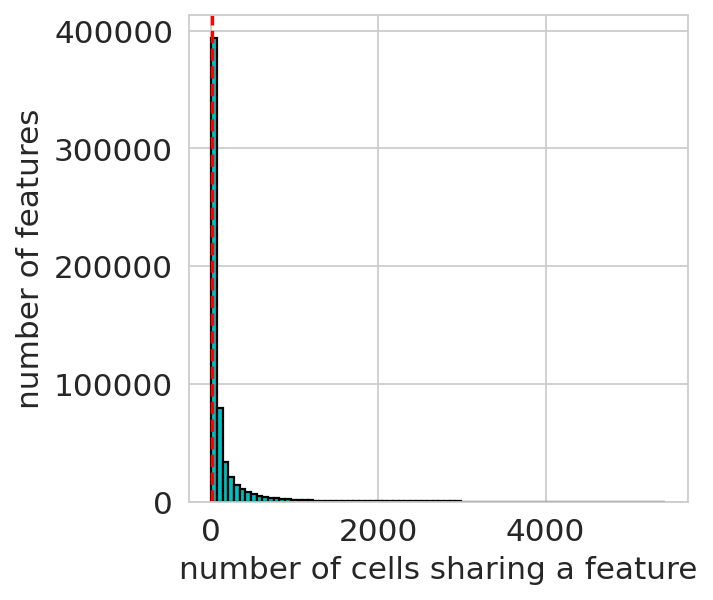

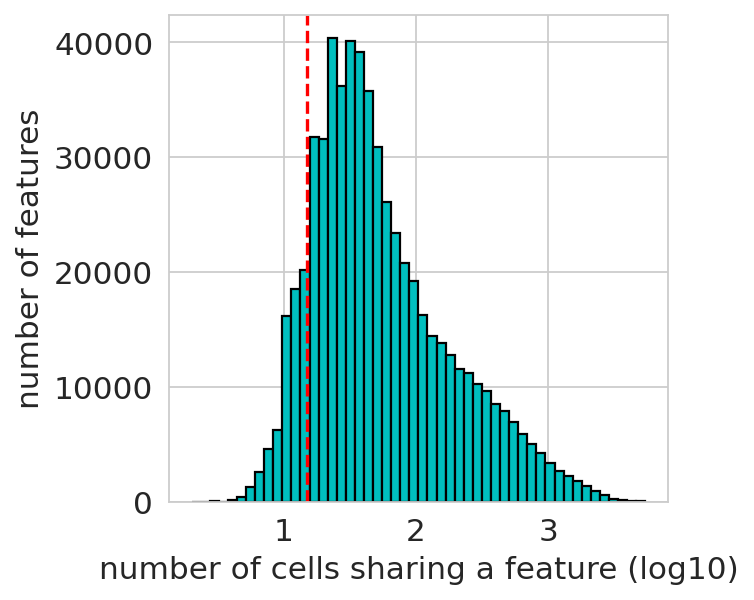

In [192]:
# minimum number of cells sharing a feature
min_cells = 15
epi.pp.coverage_features(adata, binary=True, log=False, 
                        threshold=min_cells, save='10x_feature_coverage_for_bbknn_integration.png')
epi.pp.coverage_features(adata, binary=True, log=True, 
                        threshold=min_cells, save='10x_feature_coverage_log10_for_bbknn_integration.png')

In [193]:
epi.pp.filter_features(adata, min_cells=min_cells)
adata

AnnData object with n_obs × n_vars = 10234 × 537195
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness'

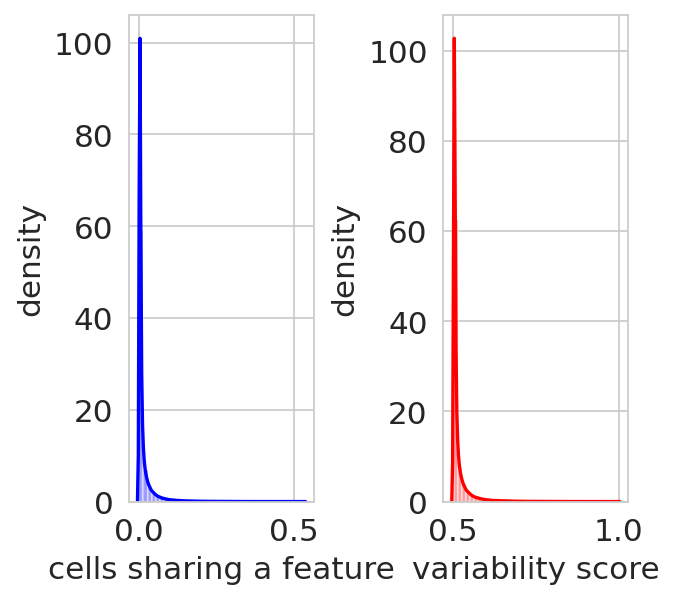

In [194]:
epi.pp.cal_var(adata)

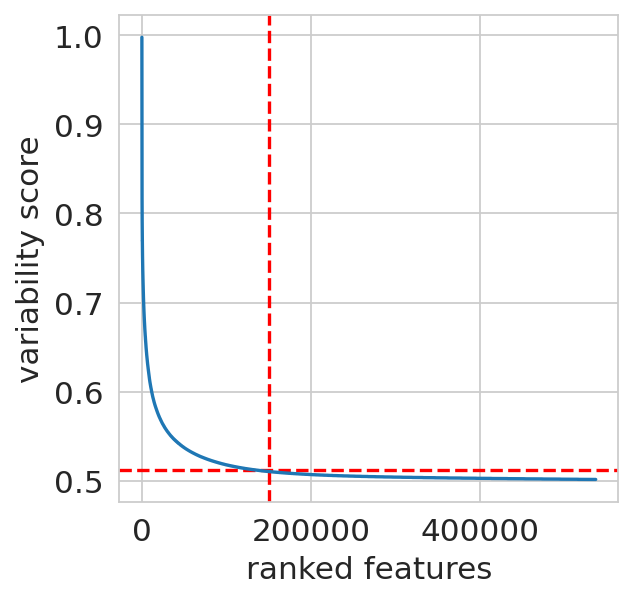

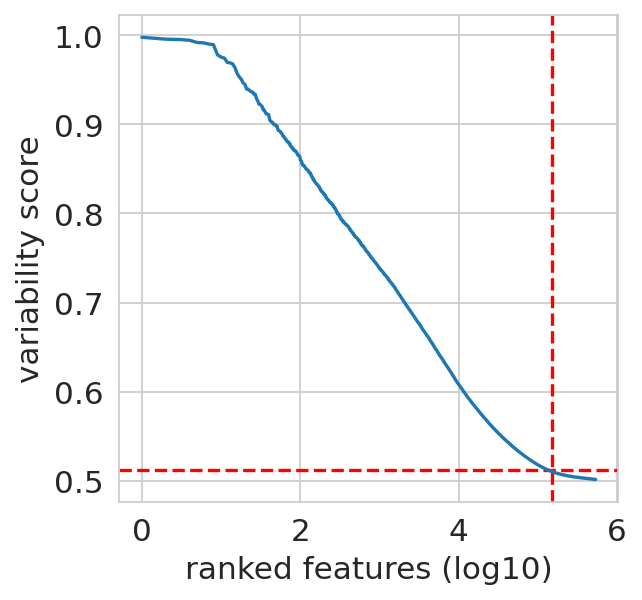

In [195]:
min_score_value = 0.5125
nb_feature_selected = 150000
epi.pl.variability_features(adata,log=None,
                     min_score=min_score_value,
                     nb_features=nb_feature_selected,
                     save='variability_features_plot_10x.png')

epi.pl.variability_features(adata,log='log10',
                     min_score=min_score_value, nb_features=nb_feature_selected,
                     save='variability_features_plot_10x_log10.png')

In [196]:
# save the current matrix in the raw layer
adata.raw = adata

In [197]:
nb_feature_selected = 150000
# create a new AnnData containing only the most variable features
adata = epi.pp.select_var_feature(adata,
                                  nb_features=nb_feature_selected,
                                  show=False,
                                  copy=True)

In [198]:
adata

View of AnnData object with n_obs × n_vars = 10234 × 150513
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'

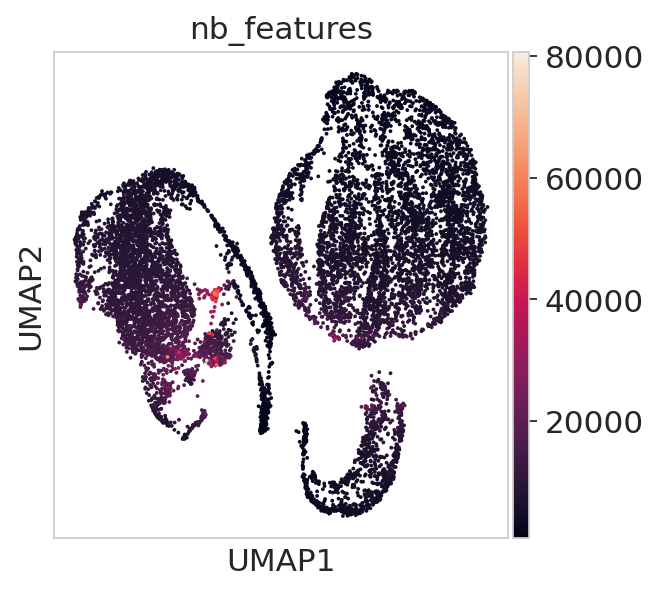

In [199]:
epi.pp.lazy(adata)
sc.pl.umap(adata, color=['nb_features'], wspace=0.3)

In [200]:
adata.layers['counts'] = adata.X
epi.pp.normalize_per_cell(adata)

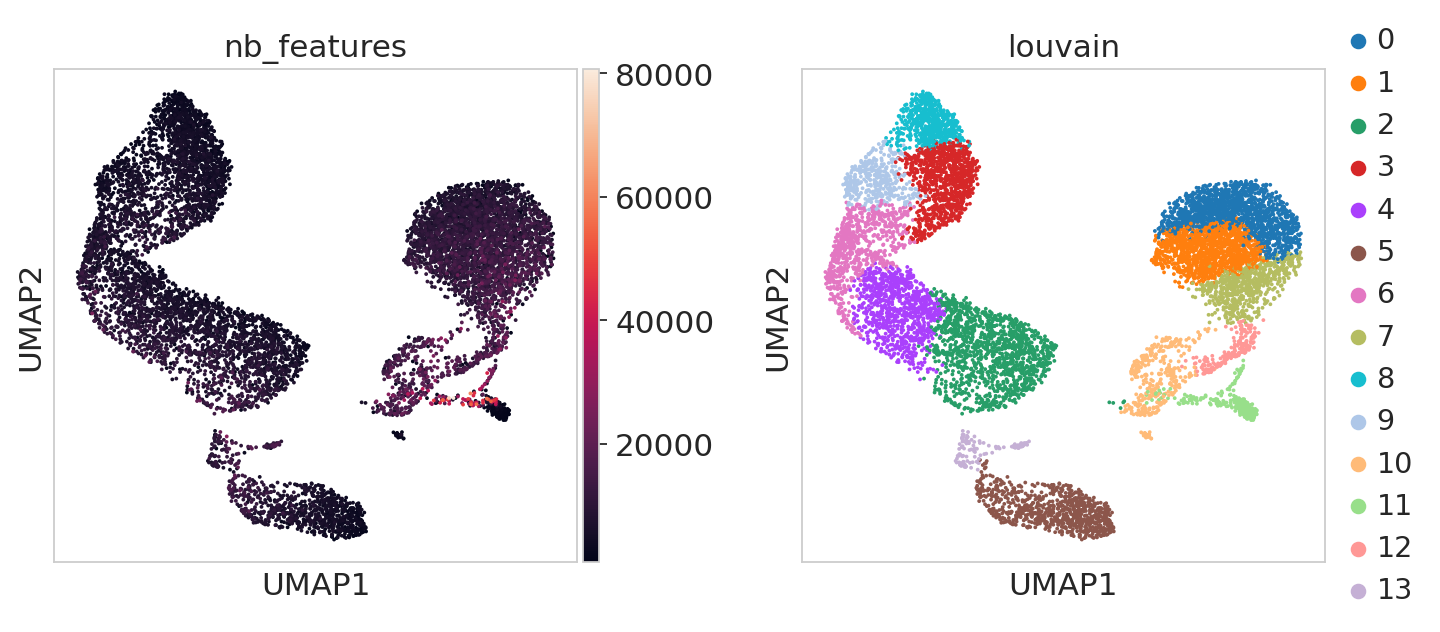

In [201]:
epi.pp.lazy(adata)
epi.tl.louvain(adata)
sc.pl.umap(adata, color=['nb_features', 'louvain'], wspace=0.3)

In [202]:
adata1 = adata.copy()
epi.pp.log1p(adata1)

In [204]:
epi.pp.lazy(adata1)
epi.tl.louvain(adata1)

In [205]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=250,
                     frameon=True, vector_friendly=True,
                     color_map="YlGnBu", format='pdf', transparent=False,
                     ipython_format='png2x')

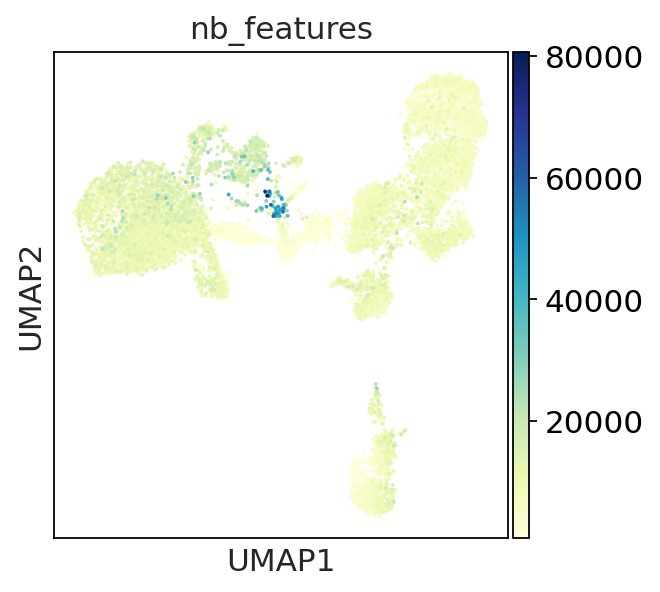

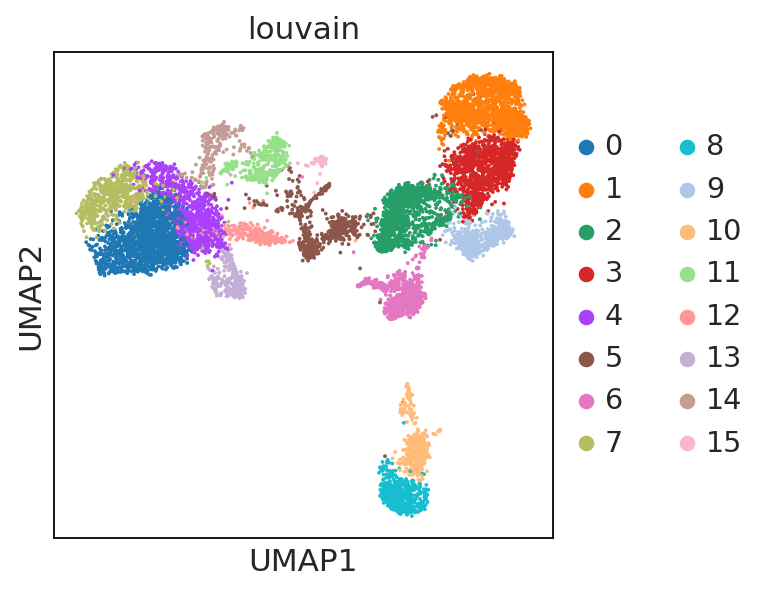

In [206]:
sc.pl.umap(adata1,
           color=['nb_features'],
           save='10x_for_integration_log1p_nb_features.png')
sc.pl.umap(adata1,
           color=['louvain'],
           save='10x_for_integration_log1p_louvain.png')

In [207]:
adata.write('processed_10x_not_log1p_pre_integration_with_greenleaf.h5ad')

In [208]:
adata1.write('processed_10x_log1p_pre_integration_with_greenleaf.h5ad')

In [209]:
adata.write(DATADIR+'processed_10x_not_log1p_pre_integration_with_greenleaf.h5ad')
adata1.write(DATADIR+'processed_10x_log1p_pre_integration_with_greenleaf.h5ad')

# Load Greenleaf data

#### Loading GSM3722026_Dendritic_Cells_fragmenxd_outter_all_chrom

In [4]:
input_file_greenleaf = 'GSM3722026_Dendritic_Cells_fragmenxd_outter_all_chrom.h5ad'
adata2   = ad.read(DATADIR+input_file_greenleaf)
adata2.obs['batchname'] = [input_file_greenleaf.rstrip('h5ad') for n in adata2.obs_names.tolist()]
adata2.var_names_make_unique()
adata2

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 184150 × 618749
    obs: 'batchname'

In [5]:
epi.pp.filter_cells(adata2, min_features=100)
adata2

AnnData object with n_obs × n_vars = 1996 × 618749
    obs: 'batchname', 'nb_features'

#### Loading GSM3722027_Monocytes_fragmenxd_outter_all_chrom

In [6]:
input_file_greenleaf = 'GSM3722027_Monocytes_fragmenxd_outter_all_chrom.h5ad'
adata3 = ad.read(DATADIR+input_file_greenleaf)
adata3.obs['batchname'] = [input_file_greenleaf.rstrip('h5ad') for n in adata3.obs_names.tolist()]
adata3.var_names_make_unique()
adata3

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 362118 × 618749
    obs: 'batchname'

In [7]:
epi.pp.filter_cells(adata3, min_features=100)
adata3

AnnData object with n_obs × n_vars = 2681 × 618749
    obs: 'batchname', 'nb_features'

In [8]:
# concatenating the 2 anndata
adata2 = adata2.concatenate(adata3)
adata2

AnnData object with n_obs × n_vars = 4677 × 618749
    obs: 'batchname', 'nb_features', 'batch'

#### Loading GSM3722028_B_Cells_fragmenxd_outter_all_chrom

In [9]:
input_file_greenleaf = 'GSM3722028_B_Cells_fragmenxd_outter_all_chrom.h5ad'
adata3 = ad.read(DATADIR+input_file_greenleaf)
adata3.obs['batchname'] = [input_file_greenleaf.rstrip('h5ad') for n in adata3.obs_names.tolist()]
adata3.var_names_make_unique()
adata3

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 338090 × 618749
    obs: 'batchname'

In [10]:
epi.pp.filter_cells(adata3, min_features=100)
adata3

AnnData object with n_obs × n_vars = 3811 × 618749
    obs: 'batchname', 'nb_features'

In [11]:
# concatenating the 2 anndata
adata2 = adata2.concatenate(adata3)
adata2

AnnData object with n_obs × n_vars = 8488 × 618749
    obs: 'batchname', 'nb_features', 'batch'

#### Loading GSM3722029_CD34_Progenitors_Rep1_fragmenxd_outter_all_chrom

In [12]:
input_file_greenleaf = 'GSM3722029_CD34_Progenitors_Rep1_fragmenxd_outter_all_chrom.h5ad'
adata3 = ad.read(DATADIR+input_file_greenleaf)
adata3.obs['batchname'] = [input_file_greenleaf.rstrip('h5ad') for n in adata3.obs_names.tolist()]
adata3.var_names_make_unique()
adata3

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 501713 × 618749
    obs: 'batchname'

In [13]:
epi.pp.filter_cells(adata3, min_features=100)
adata3

AnnData object with n_obs × n_vars = 13622 × 618749
    obs: 'batchname', 'nb_features'

In [14]:
# concatenating the 2 anndata
adata2 = adata2.concatenate(adata3)
adata2

AnnData object with n_obs × n_vars = 22110 × 618749
    obs: 'batchname', 'nb_features', 'batch'

#### Loading GSM3722030_Regulatory_T_Cells_fragmenxd_outter_all_chrom

In [15]:
input_file_greenleaf = 'GSM3722030_Regulatory_T_Cells_fragmenxd_outter_all_chrom.h5ad'
adata3 = ad.read(DATADIR+input_file_greenleaf)
adata3.obs['batchname'] = [input_file_greenleaf.rstrip('h5ad') for n in adata3.obs_names.tolist()]
adata3.var_names_make_unique()
adata3

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 315456 × 618749
    obs: 'batchname'

In [16]:
epi.pp.filter_cells(adata3, min_features=100)
adata3

AnnData object with n_obs × n_vars = 3087 × 618749
    obs: 'batchname', 'nb_features'

In [17]:
# concatenating the 2 anndata
adata2 = adata2.concatenate(adata3)
adata2

AnnData object with n_obs × n_vars = 25197 × 618749
    obs: 'batchname', 'nb_features', 'batch'

#### Loading GSM3722031_Naive_CD4_T_Cells_Rep1_fragmenxd_outter_all_chrom

In [18]:
input_file_greenleaf = 'GSM3722031_Naive_CD4_T_Cells_Rep1_fragmenxd_outter_all_chrom.h5ad'
adata3 = ad.read(DATADIR+input_file_greenleaf)
adata3.obs['batchname'] = [input_file_greenleaf.rstrip('h5ad') for n in adata3.obs_names.tolist()]
adata3.var_names_make_unique()
adata3

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 239905 × 618749
    obs: 'batchname'

In [19]:
epi.pp.filter_cells(adata3, min_features=100)
adata3

AnnData object with n_obs × n_vars = 932 × 618749
    obs: 'batchname', 'nb_features'

In [20]:
# concatenating the 2 anndata
adata2 = adata2.concatenate(adata3)
adata2

AnnData object with n_obs × n_vars = 26129 × 618749
    obs: 'batchname', 'nb_features', 'batch'

#### Loading GSM3722033_CD4_HelperT_fragmenxd_outter_all_chrom

In [21]:
input_file_greenleaf = 'GSM3722033_CD4_HelperT_fragmenxd_outter_all_chrom.h5ad'
adata3 = ad.read(DATADIR+input_file_greenleaf)
adata3.obs['batchname'] = [input_file_greenleaf.rstrip('h5ad') for n in adata3.obs_names.tolist()]
adata3.var_names_make_unique()
adata3

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 270599 × 618749
    obs: 'batchname'

In [22]:
epi.pp.filter_cells(adata3, min_features=100)
adata3

AnnData object with n_obs × n_vars = 1806 × 618749
    obs: 'batchname', 'nb_features'

In [23]:
# concatenating the 2 anndata
adata2 = adata2.concatenate(adata3)
adata2

AnnData object with n_obs × n_vars = 27935 × 618749
    obs: 'batchname', 'nb_features', 'batch'

#### Loading GSM3722036_NK_Cells_fragmenxd_outter_all_chrom

In [24]:
input_file_greenleaf = 'GSM3722036_NK_Cells_fragmenxd_outter_all_chrom.h5ad'
adata3 = ad.read(DATADIR+input_file_greenleaf)
adata3.obs['batchname'] = [input_file_greenleaf.rstrip('h5ad') for n in adata3.obs_names.tolist()]
adata3.var_names_make_unique()
adata3

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 294123 × 618749
    obs: 'batchname'

In [25]:
epi.pp.filter_cells(adata3, min_features=100)
adata3

AnnData object with n_obs × n_vars = 1382 × 618749
    obs: 'batchname', 'nb_features'

In [26]:
# concatenating the 2 anndata
adata2 = adata2.concatenate(adata3)
adata2

AnnData object with n_obs × n_vars = 29317 × 618749
    obs: 'batchname', 'nb_features', 'batch'

#### Loading GSM3722037_Naive_CD8_T_Cells_fragmenxd_outter_all_chrom

In [27]:
input_file_greenleaf = 'GSM3722037_Naive_CD8_T_Cells_fragmenxd_outter_all_chrom.h5ad'
adata3 = ad.read(DATADIR+input_file_greenleaf)
adata3.obs['batchname'] = [input_file_greenleaf.rstrip('h5ad') for n in adata3.obs_names.tolist()]
adata3.var_names_make_unique()
adata3

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 234733 × 618749
    obs: 'batchname'

In [28]:
epi.pp.filter_cells(adata3, min_features=100)
adata3

AnnData object with n_obs × n_vars = 2340 × 618749
    obs: 'batchname', 'nb_features'

In [29]:
# concatenating the 2 anndata
adata2 = adata2.concatenate(adata3)
adata2

AnnData object with n_obs × n_vars = 31657 × 618749
    obs: 'batchname', 'nb_features', 'batch'

#### Loading GSM3722038_Memory_CD8_T_Cells_fragmenxd_outter_all_chrom

In [30]:
input_file_greenleaf = 'GSM3722038_Memory_CD8_T_Cells_fragmenxd_outter_all_chrom.h5ad'
adata3 = ad.read(DATADIR+input_file_greenleaf)
adata3.obs['batchname'] = [input_file_greenleaf.rstrip('h5ad') for n in adata3.obs_names.tolist()]
adata3.var_names_make_unique()
adata3

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 287078 × 618749
    obs: 'batchname'

In [31]:
epi.pp.filter_cells(adata3, min_features=100)
adata3

AnnData object with n_obs × n_vars = 1657 × 618749
    obs: 'batchname', 'nb_features'

In [32]:
# concatenating the 2 anndata
adata2 = adata2.concatenate(adata3)
adata2

AnnData object with n_obs × n_vars = 33314 × 618749
    obs: 'batchname', 'nb_features', 'batch'

#### Loading GSM3722071_Bone_Marrow_Rep1_fragmenxd_outter_all_chrom

In [33]:
input_file_greenleaf = 'GSM3722071_Bone_Marrow_Rep1_fragmenxd_outter_all_chrom.h5ad'
adata3 = ad.read(DATADIR+input_file_greenleaf)
adata3.obs['batchname'] = [input_file_greenleaf.rstrip('h5ad') for n in adata3.obs_names.tolist()]
adata3.var_names_make_unique()
adata3

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 340410 × 618749
    obs: 'batchname'

In [34]:
epi.pp.filter_cells(adata3, min_features=100)
adata3

AnnData object with n_obs × n_vars = 10433 × 618749
    obs: 'batchname', 'nb_features'

In [35]:
# concatenating the 2 anndata
adata2 = adata2.concatenate(adata3)
adata2

AnnData object with n_obs × n_vars = 43747 × 618749
    obs: 'batchname', 'nb_features', 'batch'

#### Loading GSM3722072_CD34_Progenitors_Rep2_fragmen_merged_peaks_for_integration_greenleaf__outter_all_chrom

In [36]:
input_file_greenleaf = 'GSM3722072_CD34_Progenitors_Rep2_fragmen_merged_peaks_for_integration_greenleaf__outter_all_chrom.h5ad'
adata3 = ad.read(DATADIR+input_file_greenleaf)
adata3.obs['batchname'] = [input_file_greenleaf.rstrip('h5ad') for n in adata3.obs_names.tolist()]
adata3.var_names_make_unique()
adata3

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 327749 × 618749
    obs: 'batchname'

In [37]:
epi.pp.filter_cells(adata3, min_features=100)
adata3

AnnData object with n_obs × n_vars = 6433 × 618749
    obs: 'batchname', 'nb_features'

In [38]:
# concatenating the 2 anndata
adata2 = adata2.concatenate(adata3)
adata2

AnnData object with n_obs × n_vars = 50180 × 618749
    obs: 'batchname', 'nb_features', 'batch'

#### Loading GSM3722073_Memory_CD4_T_Cells_Rep2_fragmenxd_outter_all_chrom

In [39]:
input_file_greenleaf = 'GSM3722073_Memory_CD4_T_Cells_Rep2_fragmenxd_outter_all_chrom.h5ad'
adata3 = ad.read(DATADIR+input_file_greenleaf)
adata3.obs['batchname'] = [input_file_greenleaf.rstrip('h5ad') for n in adata3.obs_names.tolist()]
adata3.var_names_make_unique()
adata3

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 274573 × 618749
    obs: 'batchname'

In [40]:
epi.pp.filter_cells(adata3, min_features=100)
adata3

AnnData object with n_obs × n_vars = 2809 × 618749
    obs: 'batchname', 'nb_features'

In [41]:
# concatenating the 2 anndata
adata2 = adata2.concatenate(adata3)
adata2

AnnData object with n_obs × n_vars = 52989 × 618749
    obs: 'batchname', 'nb_features', 'batch'

#### Loading GSM3722074_Naive_CD4_T_Cells_Rep2_fragmenxd_outter_all_chrom

In [42]:
input_file_greenleaf = 'GSM3722074_Naive_CD4_T_Cells_Rep2_fragmenxd_outter_all_chrom.h5ad'
adata3 = ad.read(DATADIR+input_file_greenleaf)
adata3.obs['batchname'] = [input_file_greenleaf.rstrip('h5ad') for n in adata3.obs_names.tolist()]
adata3.var_names_make_unique()
adata3

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 273552 × 618749
    obs: 'batchname'

In [43]:
epi.pp.filter_cells(adata3, min_features=100)
adata3

AnnData object with n_obs × n_vars = 3306 × 618749
    obs: 'batchname', 'nb_features'

In [44]:
# concatenating the 2 anndata
adata2 = adata2.concatenate(adata3)
adata2

AnnData object with n_obs × n_vars = 56295 × 618749
    obs: 'batchname', 'nb_features', 'batch'

#### Loading GSM3722075_PBMC_Rep3_fragmenxd_outter_all_chrom

In [45]:
input_file_greenleaf = 'GSM3722075_PBMC_Rep3_fragmenxd_outter_all_chrom.h5ad'
adata3 = ad.read(DATADIR+input_file_greenleaf)
adata3.obs['batchname'] = [input_file_greenleaf.rstrip('h5ad') for n in adata3.obs_names.tolist()]
adata3.var_names_make_unique()
adata3

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 320591 × 618749
    obs: 'batchname'

In [46]:
epi.pp.filter_cells(adata3, min_features=100)
adata3

AnnData object with n_obs × n_vars = 6971 × 618749
    obs: 'batchname', 'nb_features'

In [47]:
# concatenating the 2 anndata
adata2 = adata2.concatenate(adata3)
adata2

AnnData object with n_obs × n_vars = 63266 × 618749
    obs: 'batchname', 'nb_features', 'batch'

#### Loading GSM3722076_PBMC_Rep2_fragmenxd_outter_all_chrom

In [48]:
input_file_greenleaf = 'GSM3722076_PBMC_Rep2_fragmenxd_outter_all_chrom.h5ad'
adata3 = ad.read(DATADIR+input_file_greenleaf)
adata3.obs['batchname'] = [input_file_greenleaf.rstrip('h5ad') for n in adata3.obs_names.tolist()]
adata3.var_names_make_unique()
adata3

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 398600 × 618749
    obs: 'batchname'

In [49]:
epi.pp.filter_cells(adata3, min_features=100)
adata3

AnnData object with n_obs × n_vars = 13050 × 618749
    obs: 'batchname', 'nb_features'

In [50]:
# concatenating the 2 anndata
adata2 = adata2.concatenate(adata3)
adata2

AnnData object with n_obs × n_vars = 76316 × 618749
    obs: 'batchname', 'nb_features', 'batch'

#### Loading GSM3722077_PBMC_Rep4_fragmenxd_outter_all_chrom

In [51]:
input_file_greenleaf = 'GSM3722077_PBMC_Rep4_fragmenxd_outter_all_chrom.h5ad'
adata3 = ad.read(DATADIR+input_file_greenleaf)
adata3.obs['batchname'] = [input_file_greenleaf.rstrip('h5ad') for n in adata3.obs_names.tolist()]
adata3.var_names_make_unique()
adata3

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 138291 × 618749
    obs: 'batchname'

In [52]:
epi.pp.filter_cells(adata3, min_features=100)
adata3

AnnData object with n_obs × n_vars = 1509 × 618749
    obs: 'batchname', 'nb_features'

In [53]:
# concatenating the 2 anndata
adata2 = adata2.concatenate(adata3)
adata2

AnnData object with n_obs × n_vars = 77825 × 618749
    obs: 'batchname', 'nb_features', 'batch'

#### Loading GSM3722032_Memory_CD4_T_Cells_Rep1_fragmen_merged_peaks_for_integration_greenleaf__outter_all_chrom

In [54]:
input_file_greenleaf = 'GSM3722032_Memory_CD4_T_Cells_Rep1_fragmen_merged_peaks_for_integration_greenleaf__outter_all_chrom.h5ad'
adata3 = ad.read(input_file_greenleaf)
adata3.obs['batchname'] = [input_file_greenleaf.rstrip('h5ad') for n in adata3.obs_names.tolist()]
adata3.var_names_make_unique()
adata3

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 265338 × 618749
    obs: 'batchname'

In [55]:
epi.pp.filter_cells(adata3, min_features=100)
adata3

AnnData object with n_obs × n_vars = 1545 × 618749
    obs: 'batchname', 'nb_features'

In [56]:
# concatenating the 2 anndata
adata2 = adata2.concatenate(adata3)
adata2

AnnData object with n_obs × n_vars = 79370 × 618749
    obs: 'batchname', 'nb_features', 'batch'

## Format to extract the cell label

In [57]:
adata2.obs['GSM_id'] = [x.split('_')[0] for x in adata2.obs['batchname']]
adata2.obs['file_name'] = ['_'.join(x.rstrip('_fragmenxd_outter_all_chrom.').split('_')[1:]) for x in adata2.obs['batchname']]
adata2.obs['file_name'] = [x.rstrip('_fragmen_merged_peaks_for_integrati') for x in adata2.obs['file_name']]
adata2.obs['cell_type'] = [x.rstrip('_Rep1') for x in adata2.obs['file_name']]
adata2.obs['cell_type'] = [x.rstrip('_Rep2') for x in adata2.obs['cell_type']]

In [58]:
set(adata2.obs['cell_type'])

{'B_Cell',
 'Bone_Marrow',
 'CD34_Progenitors',
 'CD4_HelperT',
 'Dendritic_Cell',
 'Memory_CD4_T_Cells',
 'Memory_CD8_T_Cell',
 'Monocy',
 'NK_Cell',
 'Naive_CD4_T_Cells',
 'Naive_CD8_T_Cell',
 'PBMC',
 'PBMC_Rep3',
 'PBMC_Rep4',
 'Regulatory_T_Cell'}

## save raw greenleaf file preintegration

In [59]:
adata2.write(DATADIR+'raw_greenleaf_pre_integration_oct_2020.h5ad')

... storing 'batchname' as categorical
... storing 'GSM_id' as categorical
... storing 'file_name' as categorical
... storing 'cell_type' as categorical


# Processing Greenleaf data for integration

In [91]:
DATADIR

'/storage/scratch/users/anna.danese/greenleaf_tsv/'

In [92]:
adata = ad.read(DATADIR+'raw_greenleaf_pre_integration_oct_2020.h5ad')
adata

AnnData object with n_obs × n_vars = 79370 × 618749
    obs: 'batchname', 'nb_features', 'batch', 'GSM_id', 'file_name', 'cell_type'

In [93]:
np.max(adata.X)

467.0

In [94]:
epi.pp.binarize(adata)
np.max(adata.X)

1.0

In [95]:
adata

AnnData object with n_obs × n_vars = 79370 × 618749
    obs: 'batchname', 'nb_features', 'batch', 'GSM_id', 'file_name', 'cell_type'

In [96]:
epi.pp.filter_cells(adata, min_features=100)
adata

AnnData object with n_obs × n_vars = 79370 × 618749
    obs: 'batchname', 'nb_features', 'batch', 'GSM_id', 'file_name', 'cell_type'

In [97]:
epi.pp.filter_features(adata, min_cells=10)
adata

AnnData object with n_obs × n_vars = 79370 × 618737
    obs: 'batchname', 'nb_features', 'batch', 'GSM_id', 'file_name', 'cell_type'
    var: 'n_cells'

In [98]:
adata.obs['log_nb_features'] = [np.log10(x) for x in adata.obs['nb_features']]
adata

AnnData object with n_obs × n_vars = 79370 × 618737
    obs: 'batchname', 'nb_features', 'batch', 'GSM_id', 'file_name', 'cell_type', 'log_nb_features'
    var: 'n_cells'

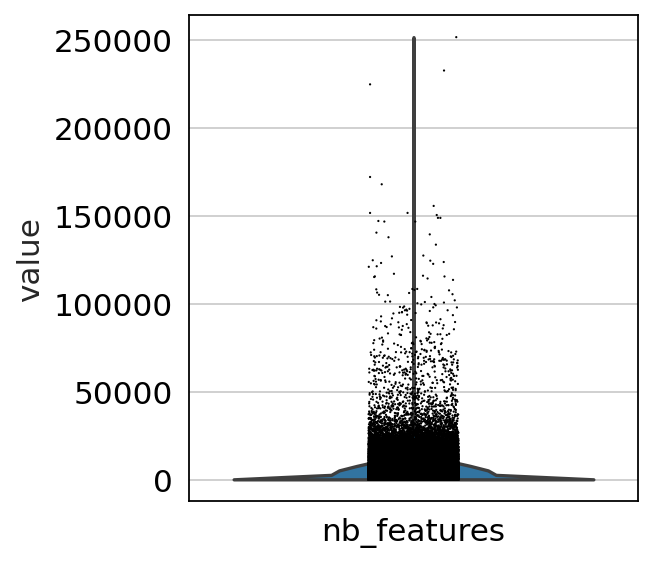

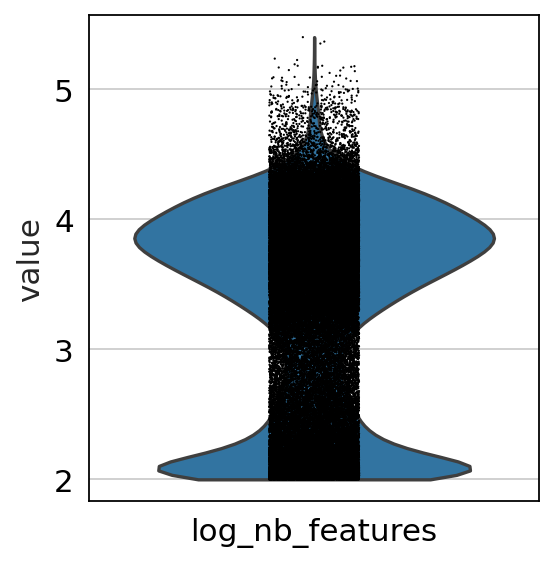

In [99]:
epi.pl.violin(adata, ['nb_features'])
epi.pl.violin(adata, ['log_nb_features'])

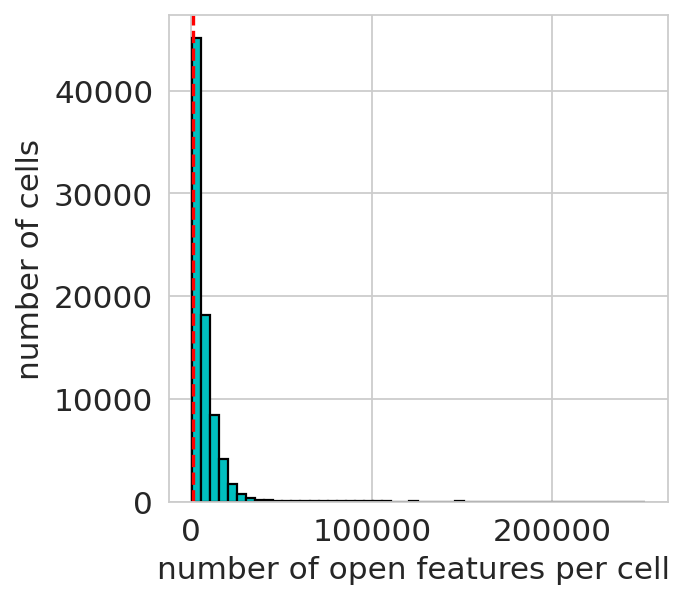

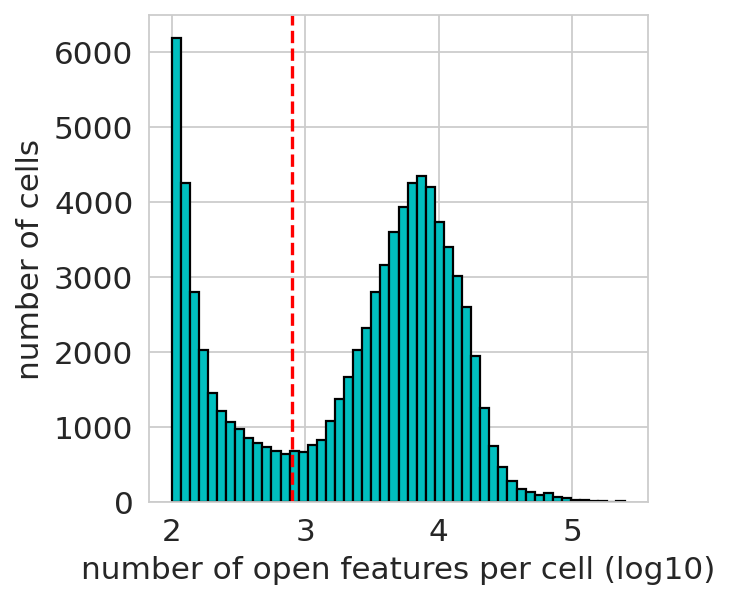

In [101]:
# set a minimum number of cells to keep 
min_features = 800

epi.pp.coverage_cells(adata, binary=True, log=False, bins=50,
               threshold=min_features, save='greenleaf_coverage_cells_for_bbknn_integration.png')
epi.pp.coverage_cells(adata, binary=True, log=10, bins=50,
               threshold=min_features, save='greenleaf_coverage_cells_log10_for_bbknn_integration.png')

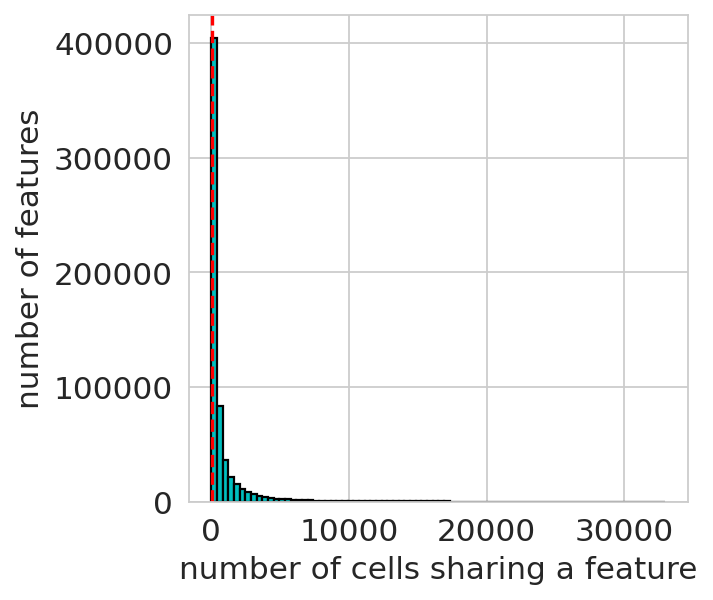

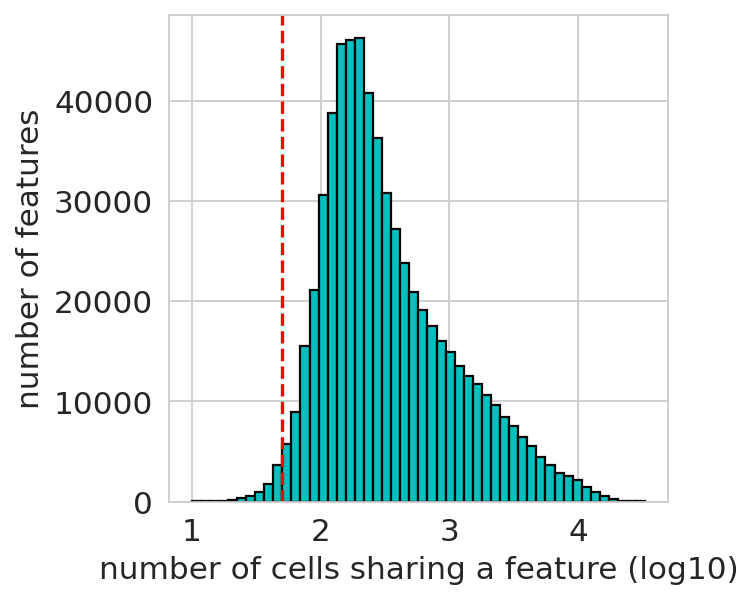

In [102]:
# minimum number of cells sharing a feature
min_cells = 50
epi.pp.coverage_features(adata, binary=True, log=False, 
                        threshold=min_cells, save='greenleaf_feature_coverage_for_bbknn_integration.png')
epi.pp.coverage_features(adata, binary=True, log=True, 
                        threshold=min_cells, save='greenleaf_feature_coverage_log10_for_bbknn_integration.png')

In [103]:
epi.pp.filter_cells(adata, min_features=min_features)
adata

AnnData object with n_obs × n_vars = 55574 × 618737
    obs: 'batchname', 'nb_features', 'batch', 'GSM_id', 'file_name', 'cell_type', 'log_nb_features'
    var: 'n_cells', 'commonness'

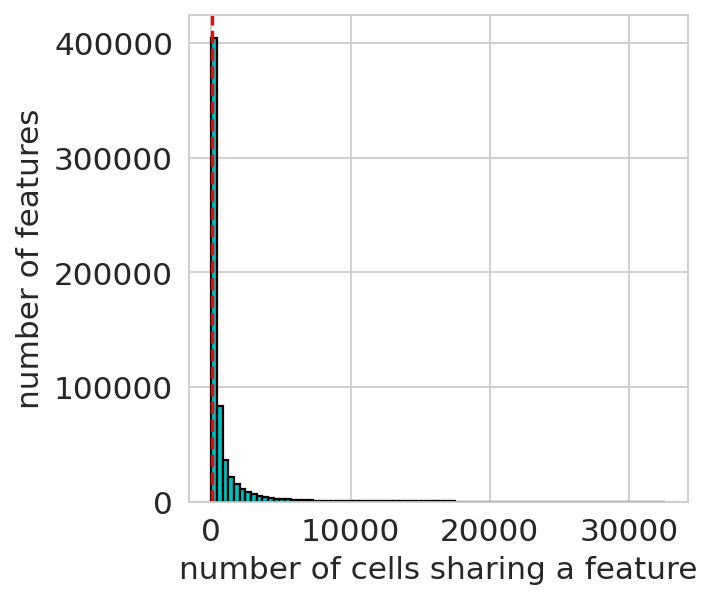

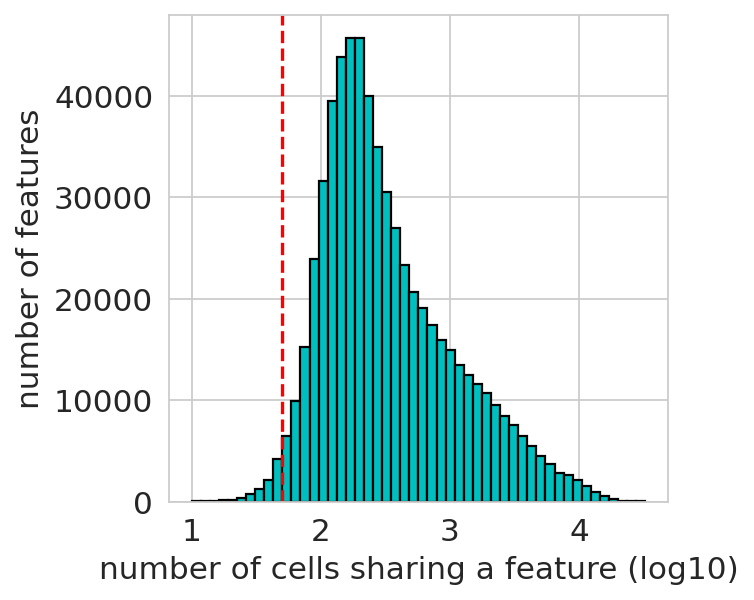

In [104]:
# minimum number of cells sharing a feature
min_cells = 50
epi.pp.coverage_features(adata, binary=True, log=False, 
                        threshold=min_cells, save='greenleaf_feature_coverage_for_bbknn_integration.png')
epi.pp.coverage_features(adata, binary=True, log=True, 
                        threshold=min_cells, save='greenleaf_feature_coverage_log10_for_bbknn_integration.png')

In [105]:
epi.pp.filter_features(adata, min_cells=min_cells)
adata

AnnData object with n_obs × n_vars = 55574 × 610369
    obs: 'batchname', 'nb_features', 'batch', 'GSM_id', 'file_name', 'cell_type', 'log_nb_features'
    var: 'n_cells', 'commonness'

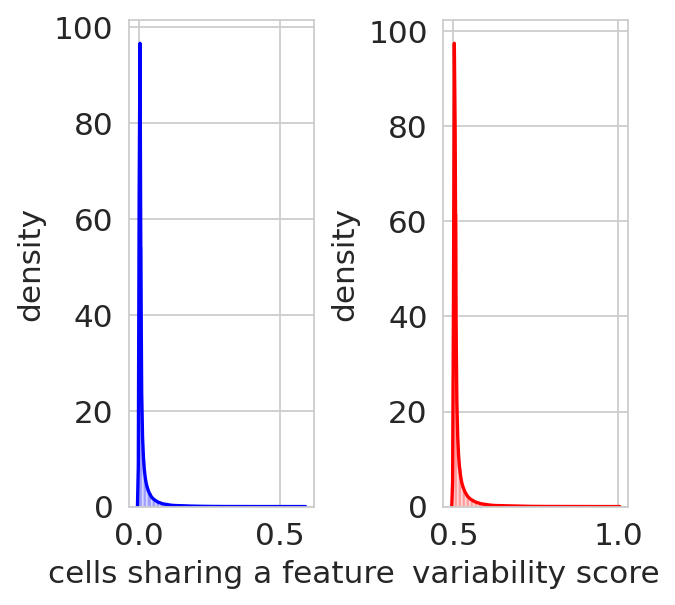

In [106]:
epi.pp.cal_var(adata)

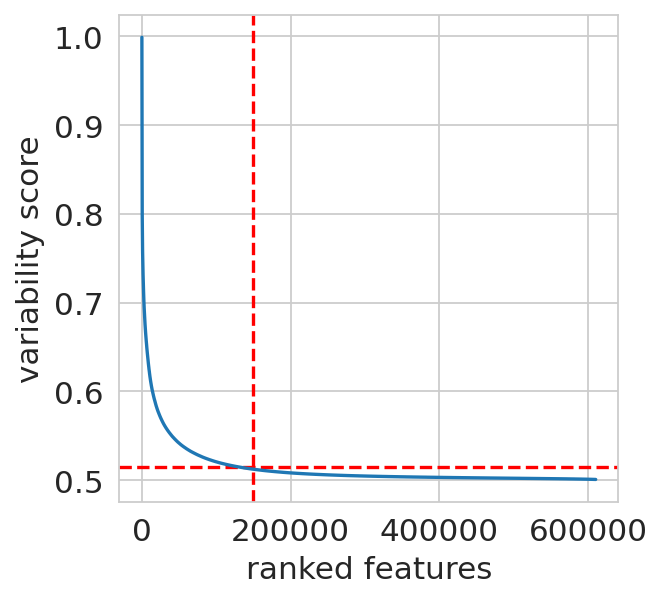

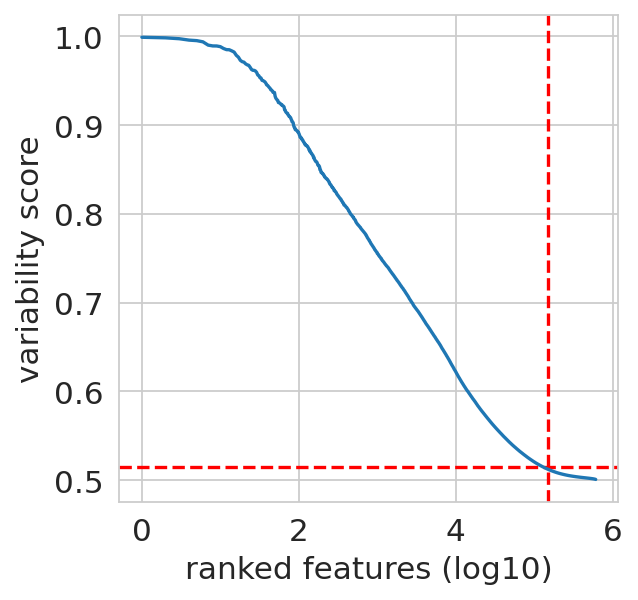

In [109]:
min_score_value = 0.515
nb_feature_selected = 150000
epi.pl.variability_features(adata,log=None,
                     min_score=min_score_value, nb_features=nb_feature_selected,
                     save='variability_features_plot_greenleaf_for_bbknn_integration.png')

epi.pl.variability_features(adata,log='log10',
                     min_score=min_score_value, nb_features=nb_feature_selected,
                     save='variability_features_plot__greenleaf_for_bbknn_integration_log10.png')

In [110]:
# save the current matrix in the raw layer
adata.raw = adata

In [111]:
nb_feature_selected = 150000
# create a new AnnData containing only the most variable features
adata = epi.pp.select_var_feature(adata,
                                  nb_features=nb_feature_selected,
                                  show=False,
                                  copy=True)

In [112]:
adata

View of AnnData object with n_obs × n_vars = 55574 × 150051
    obs: 'batchname', 'nb_features', 'batch', 'GSM_id', 'file_name', 'cell_type', 'log_nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'

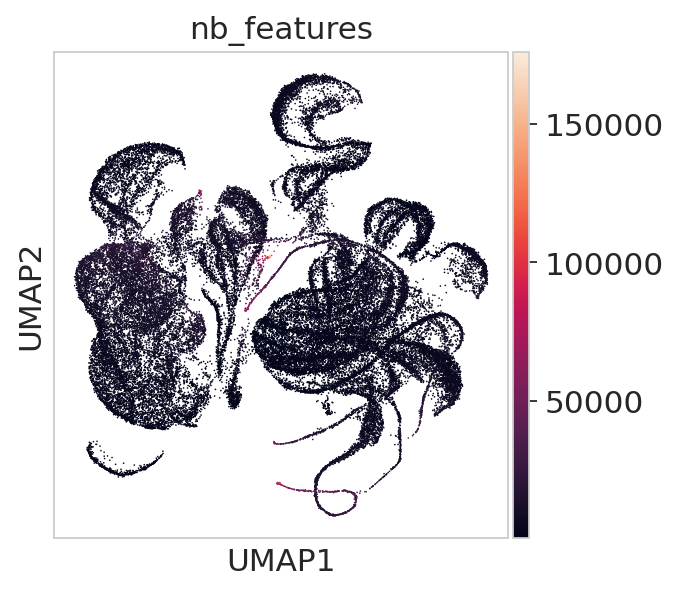

In [86]:
epi.pp.lazy(adata)
sc.pl.umap(adata, color=['nb_features'], wspace=0.3)

In [113]:
adata.layers['counts'] = adata.X
epi.pp.normalize_per_cell(adata)

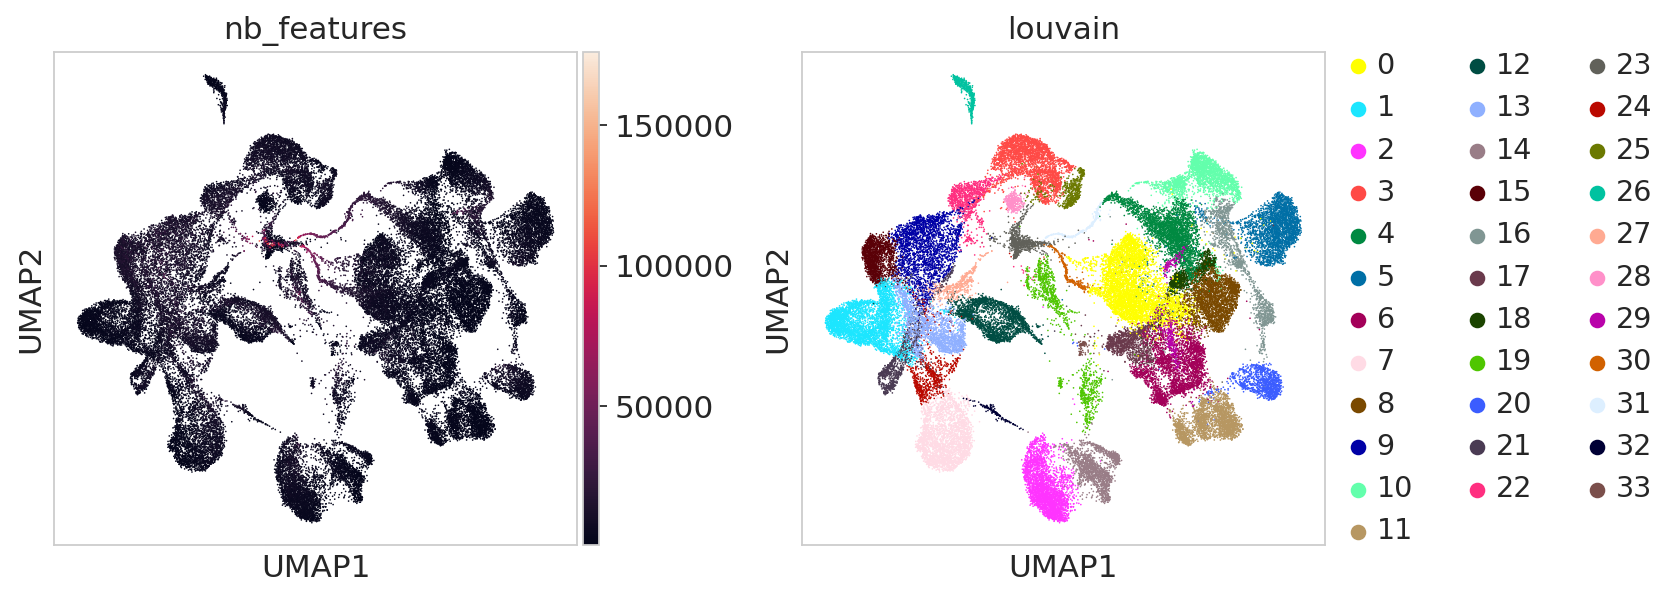

In [88]:
epi.pp.lazy(adata)
epi.tl.louvain(adata)
sc.pl.umap(adata, color=['nb_features', 'louvain'], wspace=0.3)

In [114]:
adata1 = adata.copy()
epi.pp.log1p(adata1)

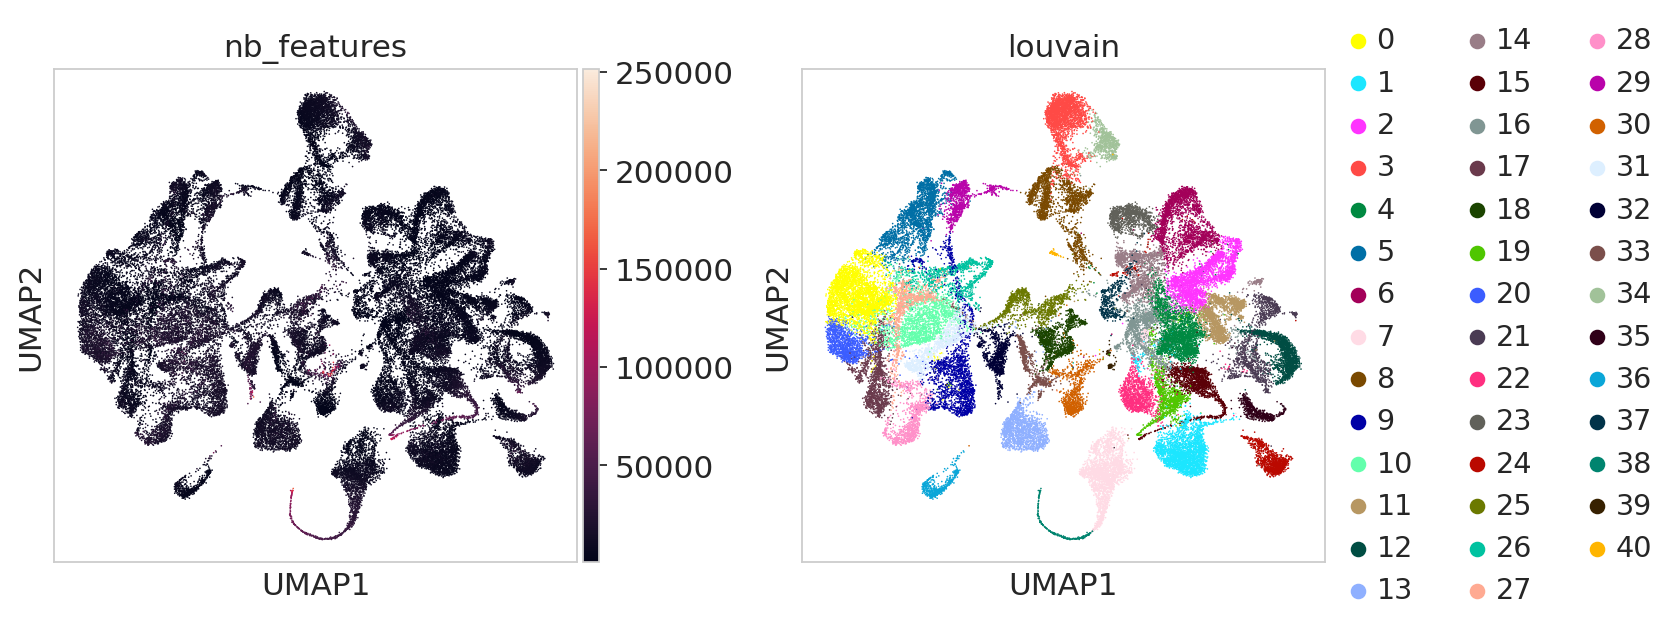

In [115]:
epi.pp.lazy(adata1)
epi.tl.louvain(adata1)
sc.pl.umap(adata1, color=['nb_features', 'louvain'], wspace=0.3)

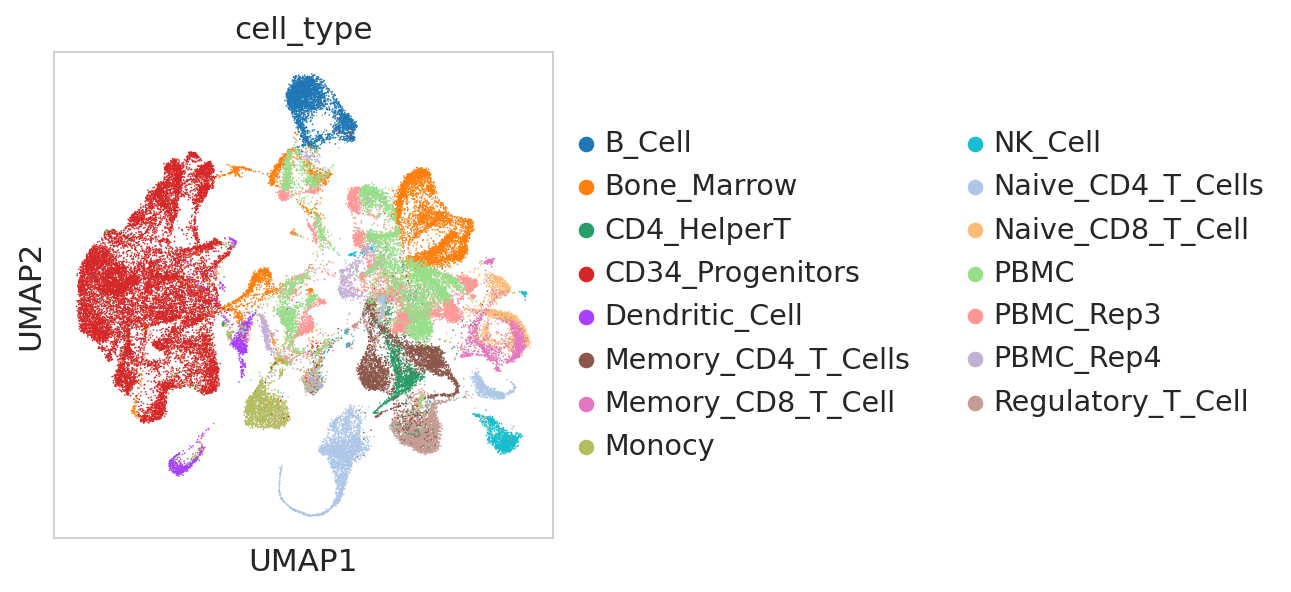

In [118]:
sc.pl.umap(adata1, color=['cell_type'], wspace=0.3)

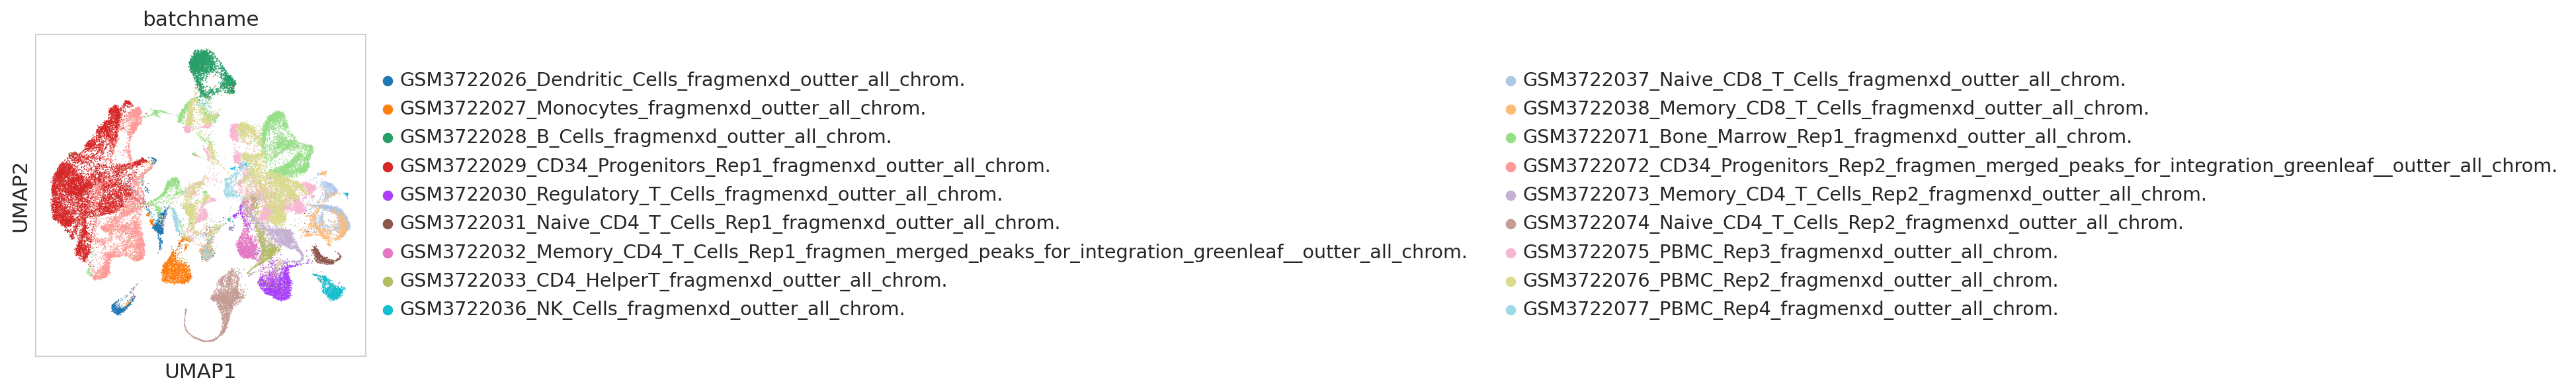

In [120]:
sc.pl.umap(adata1, color=['batchname'], wspace=0.3)

In [125]:
adata1

AnnData object with n_obs × n_vars = 55574 × 150051
    obs: 'batchname', 'nb_features', 'batch', 'GSM_id', 'file_name', 'cell_type', 'log_nb_features', 'n_counts', 'louvain'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'louvain', 'louvain_colors', 'cell_type_colors', 'batchname_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [123]:
path = '/mnt/znas/icb_zstore01/scratch/users/anna.danese/MariaR/'
obs = pd.read_csv(path+"GSE129785_scATAC-Hematopoiesis-All.cell_barcodes.txt", sep="\t")

In [130]:
obs

UMAP1     UMAP2   Clusters             Group  depth      FRIP  \
0     -2.419656  7.603472   Cluster6  Bone_Marrow_Rep1  29301  0.347190   
1      5.676727 -9.210454  Cluster20  Bone_Marrow_Rep1   7534  0.290948   
2     -7.153399 -5.512960  Cluster11  Bone_Marrow_Rep1  29608  0.449186   
3     -8.475636 -5.377475   Cluster9  Bone_Marrow_Rep1  16810  0.498632   
4      8.297910 -3.170289  Cluster31  Bone_Marrow_Rep1  14890  0.333277   
...         ...       ...        ...               ...    ...       ...   
63877 -6.923321 -2.488583   Cluster9            BM_pDC  10405  0.435944   
63878 -5.499443 -0.717886  Cluster10            BM_pDC   8397  0.443670   
63879 -6.272521 -0.969256  Cluster10            BM_pDC   3139  0.437560   
63880 -6.710894 -0.809157  Cluster10            BM_pDC   9719  0.405494   
63881 -6.646150 -0.415736  Cluster10            BM_pDC   2801  0.449839   

                      Barcodes       Internal_Name  \
0           CAAGAAAGTCAAGACG-1  SUHealthy_BM_B1_50   
1           AATGCCATCGCACAAT-1  SUHealthy_BM_B1_51   
2           AAAGGGCAGTACCCAT-1  SUHealthy_BM_B1_52   
3           CACAACATCGTGGGTC-1  SUHealthy_BM_B1_53   
4           TCCATCGGTTGGTAAA-1  SUHealthy_BM_B1_54   
...                        ...                 ...   
63877  160818_BM1137_pDC_LS_70              pDC_60   
63878  160818_BM1137_pDC_LS_35              pDC_45   
63879  160818_BM1137_pDC_LS_81              pDC_85   
63880  160818_BM1137_pDC_LS_17              pDC_76   
63881  160818_BM1137_pDC_LS_85              pDC_80   

                             Group_Barcode  
0      Bone_Marrow_Rep1#CAAGAAAGTCAAGACG-1  
1      Bone_Marrow_Rep1#AATGCCATCGCACAAT-1  
2      Bone_Marrow_Rep1#AAAGGGCAGTACCCAT-1  
3      Bone_Marrow_Rep1#CACAACATCGTGGGTC-1  
4      Bone_Marrow_Rep1#TCCATCGGTTGGTAAA-1  
...                                    ...  
63877       BM_pDC#160818_BM1137_pDC_LS_70  
63878       BM_pDC#160818_BM1137_pDC_LS_35  
63879       BM_pDC#160818_BM1137_pDC_LS_81  
63880       BM_pDC#160818_BM1137_pDC_LS_17  
63881       BM_pDC#160818_BM1137_pDC_LS_85  

[63882 rows x 9 columns]

In [129]:
set(obs['Group'])

{'BM_pDC',
 'B_Cells',
 'Bone_Marrow_Rep1',
 'CD34_Progenitors_Rep1',
 'CD34_Progenitors_Rep2',
 'CD4_HelperT',
 'CLP',
 'CMP',
 'Dendritic_Cells',
 'GMP',
 'HSC',
 'LMPP',
 'MEP',
 'MPP',
 'Memory_CD4_T_Cells_Rep1',
 'Memory_CD4_T_Cells_Rep2',
 'Memory_CD8_T_Cells',
 'Monocytes',
 'NK_Cells',
 'Naive_CD4_T_Cells_Rep1',
 'Naive_CD4_T_Cells_Rep2',
 'Naive_CD8_T_Cells',
 'PBMC_Rep1',
 'PBMC_Rep2',
 'PBMC_Rep3',
 'PBMC_Rep4',
 'Regulatory_T_Cells'}

In [128]:
set(adata1.obs['batchname'])

{'GSM3722026_Dendritic_Cells_fragmenxd_outter_all_chrom.',
 'GSM3722027_Monocytes_fragmenxd_outter_all_chrom.',
 'GSM3722028_B_Cells_fragmenxd_outter_all_chrom.',
 'GSM3722029_CD34_Progenitors_Rep1_fragmenxd_outter_all_chrom.',
 'GSM3722030_Regulatory_T_Cells_fragmenxd_outter_all_chrom.',
 'GSM3722031_Naive_CD4_T_Cells_Rep1_fragmenxd_outter_all_chrom.',
 'GSM3722032_Memory_CD4_T_Cells_Rep1_fragmen_merged_peaks_for_integration_greenleaf__outter_all_chrom.',
 'GSM3722033_CD4_HelperT_fragmenxd_outter_all_chrom.',
 'GSM3722036_NK_Cells_fragmenxd_outter_all_chrom.',
 'GSM3722037_Naive_CD8_T_Cells_fragmenxd_outter_all_chrom.',
 'GSM3722038_Memory_CD8_T_Cells_fragmenxd_outter_all_chrom.',
 'GSM3722071_Bone_Marrow_Rep1_fragmenxd_outter_all_chrom.',
 'GSM3722072_CD34_Progenitors_Rep2_fragmen_merged_peaks_for_integration_greenleaf__outter_all_chrom.',
 'GSM3722073_Memory_CD4_T_Cells_Rep2_fragmenxd_outter_all_chrom.',
 'GSM3722074_Naive_CD4_T_Cells_Rep2_fragmenxd_outter_all_chrom.',
 'GSM3722075_

In [131]:
annot = []
for n in adata1.obs['batchname']:
    value = 'NA'
    for m in set(obs['Group']):
        if m in n:
            value=m
            break
    annot.append(value)
adata1.obs['Group'] = annot

In [132]:
set(adata1.obs['Group'])

{'B_Cells',
 'Bone_Marrow_Rep1',
 'CD34_Progenitors_Rep1',
 'CD34_Progenitors_Rep2',
 'CD4_HelperT',
 'Dendritic_Cells',
 'Memory_CD4_T_Cells_Rep1',
 'Memory_CD4_T_Cells_Rep2',
 'Memory_CD8_T_Cells',
 'Monocytes',
 'NK_Cells',
 'Naive_CD4_T_Cells_Rep1',
 'Naive_CD4_T_Cells_Rep2',
 'Naive_CD8_T_Cells',
 'PBMC_Rep2',
 'PBMC_Rep3',
 'PBMC_Rep4',
 'Regulatory_T_Cells'}

In [134]:
obs[obs['Group']=='B_Cells']

UMAP1     UMAP2   Clusters    Group  depth      FRIP  \
38782 -1.546801 -1.013013  Cluster15  B_Cells  12063  0.484664   
38783 -1.584281  1.423008  Cluster14  B_Cells  11195  0.383117   
38784 -1.370016  1.310480  Cluster14  B_Cells  20304  0.464441   
38785 -1.810326  2.393045  Cluster14  B_Cells  14409  0.435908   
38786 -1.730473 -0.975858  Cluster15  B_Cells  18028  0.441452   
...         ...       ...        ...      ...    ...       ...   
41759 -2.096655  2.009757  Cluster14  B_Cells   1973  0.454384   
41760 -1.299551  1.485015  Cluster14  B_Cells   2527  0.441037   
41761 -1.534815  1.943445  Cluster14  B_Cells   2717  0.421237   
41762 -1.956737  1.890128  Cluster14  B_Cells   3601  0.345876   
41763 -1.775767 -1.143491  Cluster15  B_Cells   3587  0.360747   

                 Barcodes Internal_Name               Group_Barcode  
38782  GTTACGAAGGCTAAAT-1      CD19_B_7  B_Cells#GTTACGAAGGCTAAAT-1  
38783  TCACCACCACAAGTGG-1      CD19_B_8  B_Cells#TCACCACCACAAGTGG-1  
38784  TTCGATTTCCGAATTG-1      CD19_B_9  B_Cells#TTCGATTTCCGAATTG-1  
38785  GTGTCCTTCACAAGCT-1     CD19_B_10  B_Cells#GTGTCCTTCACAAGCT-1  
38786  GGTGCTGGTCATCAAC-1     CD19_B_11  B_Cells#GGTGCTGGTCATCAAC-1  
...                   ...           ...                         ...  
41759  TAATTCCGTGAGGTCA-1   CD19_B_2976  B_Cells#TAATTCCGTGAGGTCA-1  
41760  ATCGAGTTCTATTGTC-1   CD19_B_2981  B_Cells#ATCGAGTTCTATTGTC-1  
41761  TGCATGACAATGTGTC-1   CD19_B_2564  B_Cells#TGCATGACAATGTGTC-1  
41762  GCGCCAAAGAATAGTC-1   CD19_B_2980  B_Cells#GCGCCAAAGAATAGTC-1  
41763  GATCATGAGCTCCGGT-1   CD19_B_2982  B_Cells#GATCATGAGCTCCGGT-1  

[2982 rows x 9 columns]

In [153]:
obs[obs['Group']=='CD4_HelperT']['Clusters'].tolist()

['Cluster24',
 'Cluster19',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster21',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster13',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster25',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster11',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Cluster24',
 'Clus

In [157]:
annot = []
cell_index = 0
for cell in adata1.obs_names.tolist():
    cell = cell.split('-')[0]
    group = adata1.obs['Group'][cell_index]
    tmp_panda = obs[obs['Group']==group]
    value = 'NA'
    label_index = 0
    for labels in tmp_panda['Barcodes']:
        if cell == labels.split('-')[0]:
            value = tmp_panda['Clusters'].tolist()[label_index]
            break
        label_index += 1
    
    annot.append(value)
    cell_index += 1

In [158]:
adata1.obs['clusters'] = annot
set(adata1.obs['clusters'])

{'Cluster1',
 'Cluster10',
 'Cluster11',
 'Cluster12',
 'Cluster13',
 'Cluster14',
 'Cluster15',
 'Cluster16',
 'Cluster17',
 'Cluster18',
 'Cluster19',
 'Cluster2',
 'Cluster20',
 'Cluster21',
 'Cluster22',
 'Cluster23',
 'Cluster24',
 'Cluster25',
 'Cluster26',
 'Cluster27',
 'Cluster28',
 'Cluster29',
 'Cluster3',
 'Cluster30',
 'Cluster31',
 'Cluster4',
 'Cluster5',
 'Cluster6',
 'Cluster7',
 'Cluster8',
 'Cluster9',
 'NA'}

In [161]:
annot = []
for elem in adata1.obs["clusters"]:
    if elem == "Cluster1":
        annot.append("01_HSC_MPP")
    elif elem == "Cluster2":
        annot.append("02_MEP")
    elif elem == "Cluster3":
        annot.append("03_CMP_BMP")
    elif elem == "Cluster4":
        annot.append("04_LMPP")
    elif elem == "Cluster5":
        annot.append("05_CLP")
    elif elem == "Cluster6":
        annot.append("06_ProB")
    elif elem == "Cluster7":
        annot.append("07_PreB")
    elif elem == "Cluster8":
        annot.append("08_GMP")
    elif elem == "Cluster9":
        annot.append("09_MDP")
    elif elem == "Cluster10":
        annot.append("10_pDC")
    elif elem == "Cluster11":
        annot.append("11_cDC")
    elif elem == "Cluster12":
        annot.append("12_Mono1")
    elif elem == "Cluster13":
        annot.append("13_Mono2")
    elif elem == "Cluster14":
        annot.append("14_NaiveB")
    elif elem == "Cluster15":
        annot.append("15_MemoryB")
    elif elem == "Cluster16":
        annot.append("16_PlasmaCell")
    elif elem == "Cluster17":
        annot.append("17_Basophil")
    elif elem == "Cluster18":
        annot.append("18_ImmatureNK")
    elif elem == "Cluster19":
        annot.append("19_MatureNK1")
    elif elem == "Cluster20":
        annot.append("20_MatureNK2")
    elif elem == "Cluster21":
        annot.append("21_Naive_CD4_T1")
    elif elem == "Cluster22":
        annot.append("22_Naive_CD4_T2")
    elif elem == "Cluster23":
        annot.append("23_Naive_Treg")
    elif elem == "Cluster24":
        annot.append("24_MemoryCD4")
    elif elem == "Cluster25":
        annot.append("25_Treg")
    elif elem == "Cluster26":
        annot.append("26_Naive_CD8_T1")
    elif elem == "Cluster27":
        annot.append("27_Naive_CD8_T2")
    elif elem == "Cluster28":
        annot.append("28_Naive_CD8_T3")
    elif elem == "Cluster29":
        annot.append("29_CentralMemory_CD8_T")
    elif elem == "Cluster30":
        annot.append("30_EffectorMemory_CD8_T")
    elif elem == "Cluster31":
        annot.append("31_GammaDelta_T")
    else:
        annot.append('NA')
adata1.obs["cell_types"] = annot       

In [162]:
annot = []
for elem in adata1.obs["clusters"]:
    if elem in ["Cluster1","Cluster2","Cluster3","Cluster4","Cluster5",
                "Cluster6","Cluster7","Cluster8","Cluster9"]:
        annot.append("Progenitors")
    elif elem in ["Cluster10","Cluster11","Cluster12","Cluster13"]:
        annot.append("Myeloid cells")
    elif elem in ["Cluster14","Cluster15","Cluster16"]:
        annot.append("B cells")
    elif elem in ["Cluster17"]:
        annot.append("Basophils")
    elif elem in ["Cluster18","Cluster19","Cluster20"]:
        annot.append("NK cells")
    elif elem in ["Cluster21","Cluster22","Cluster23","Cluster24","Cluster25"]:
        annot.append("CD4+ T cells")
    elif elem in ["Cluster26","Cluster27","Cluster28","Cluster29","Cluster30","Cluster31"]:
        annot.append("CD8+ T cells")
    else:
        annot.append('NA')
        
adata1.obs["broad_annot"] = annot

In [163]:
adata1

AnnData object with n_obs × n_vars = 55574 × 150051
    obs: 'batchname', 'nb_features', 'batch', 'GSM_id', 'file_name', 'cell_type', 'log_nb_features', 'n_counts', 'louvain', 'Group', 'clusters', 'cell_types', 'broad_annot'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'louvain', 'louvain_colors', 'cell_type_colors', 'batchname_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

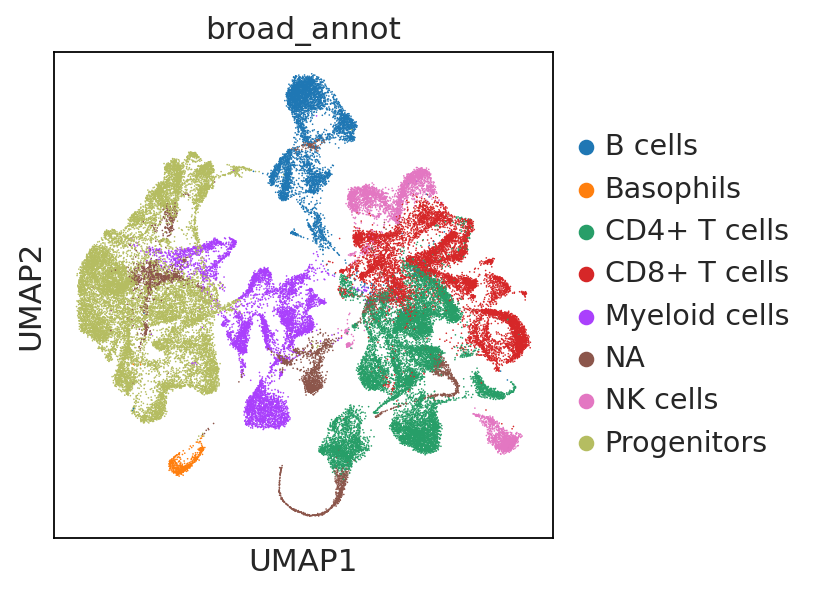

In [167]:
sc.pl.umap(adata1, color=[ 'broad_annot'], wspace=0.3)

In [168]:
adata1 = adata1[adata1.obs['broad_annot'] != 'NA',:].copy()
adata1

AnnData object with n_obs × n_vars = 52050 × 150051
    obs: 'batchname', 'nb_features', 'batch', 'GSM_id', 'file_name', 'cell_type', 'log_nb_features', 'n_counts', 'louvain', 'Group', 'clusters', 'cell_types', 'broad_annot'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'louvain', 'louvain_colors', 'cell_type_colors', 'batchname_colors', 'clusters_colors', 'cell_types_colors', 'broad_annot_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

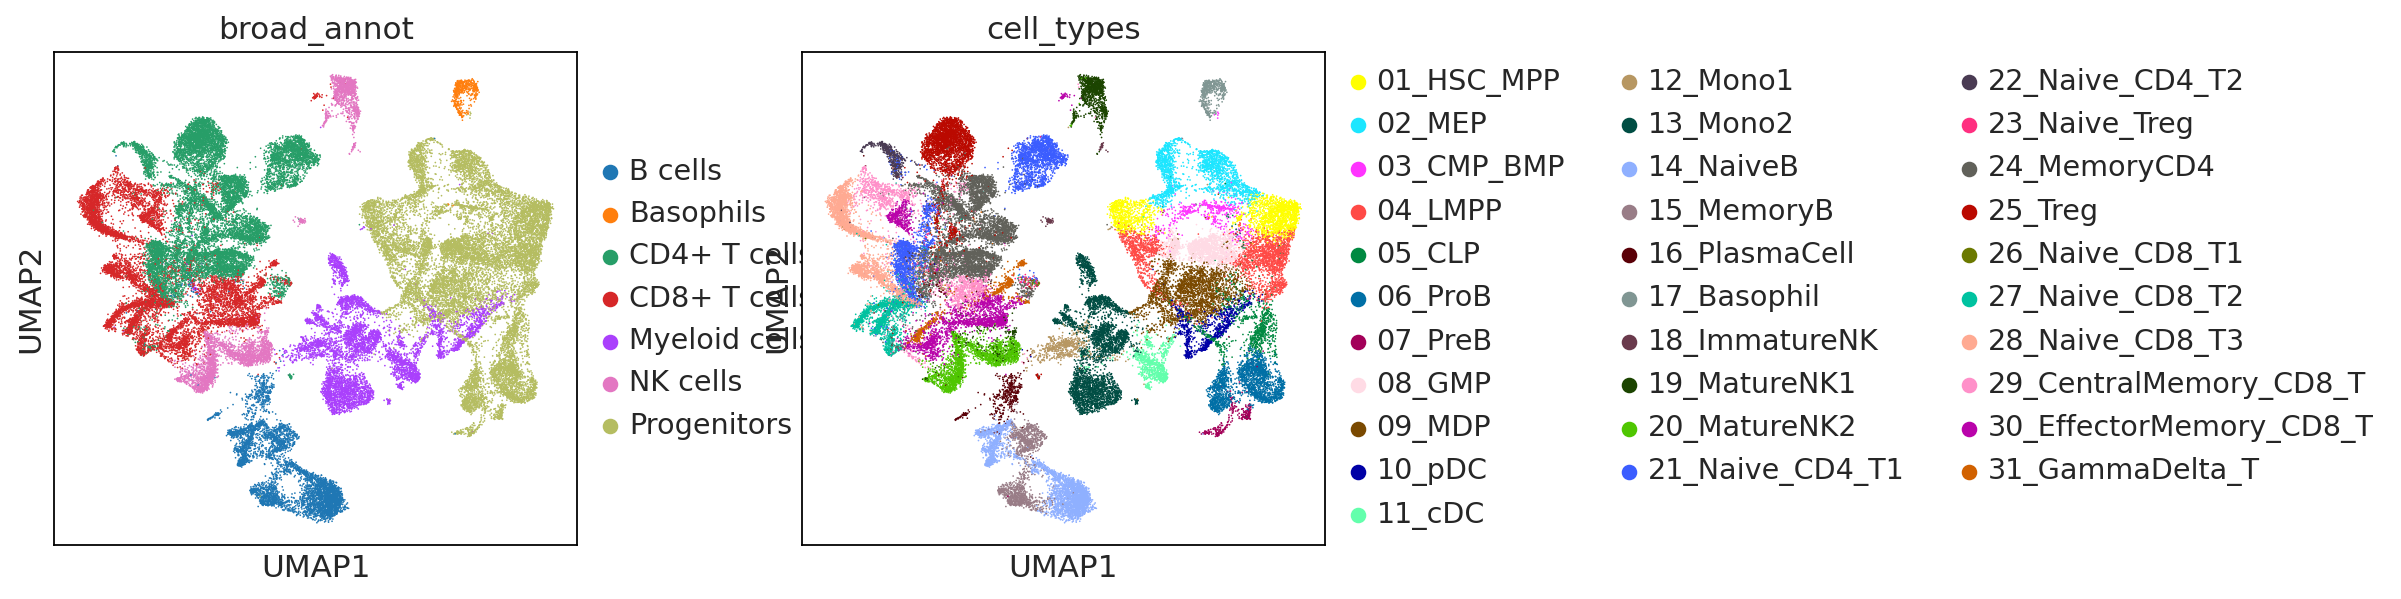

In [169]:
epi.pp.lazy(adata1)
sc.pl.umap(adata1, color=['broad_annot', 'cell_types'], wspace=0.3)

In [173]:
adata1

AnnData object with n_obs × n_vars = 52050 × 150051
    obs: 'batchname', 'nb_features', 'batch', 'GSM_id', 'file_name', 'cell_type', 'log_nb_features', 'n_counts', 'louvain', 'Group', 'clusters', 'cell_types', 'broad_annot'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'louvain', 'louvain_colors', 'cell_type_colors', 'batchname_colors', 'clusters_colors', 'cell_types_colors', 'broad_annot_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

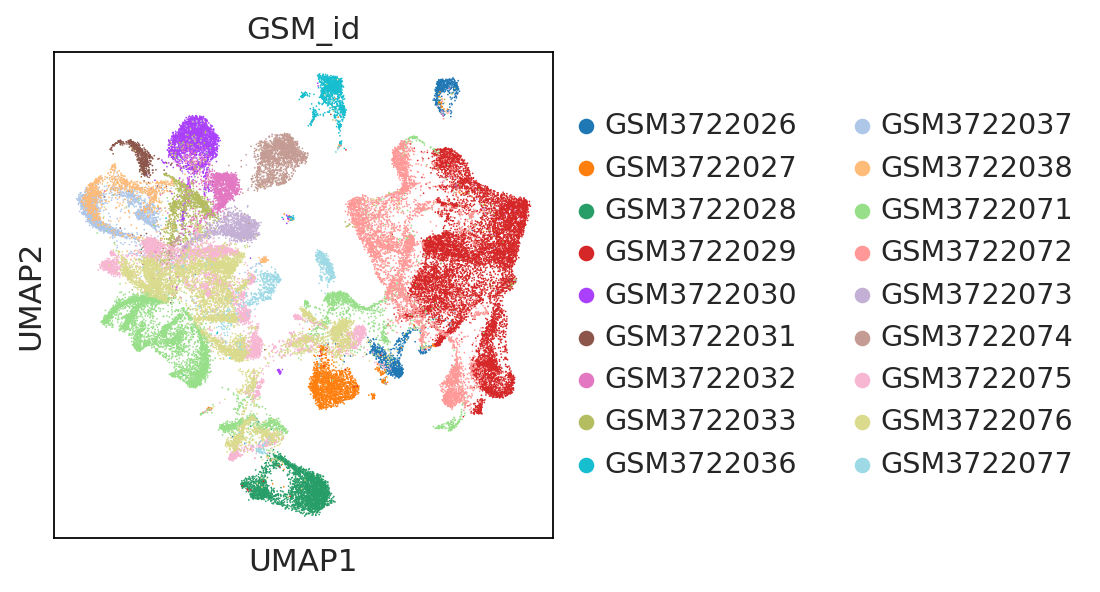

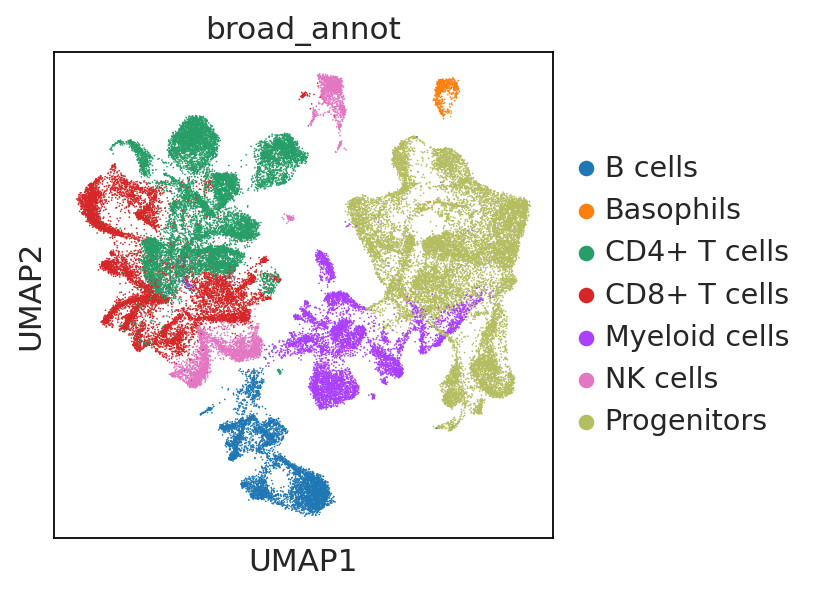

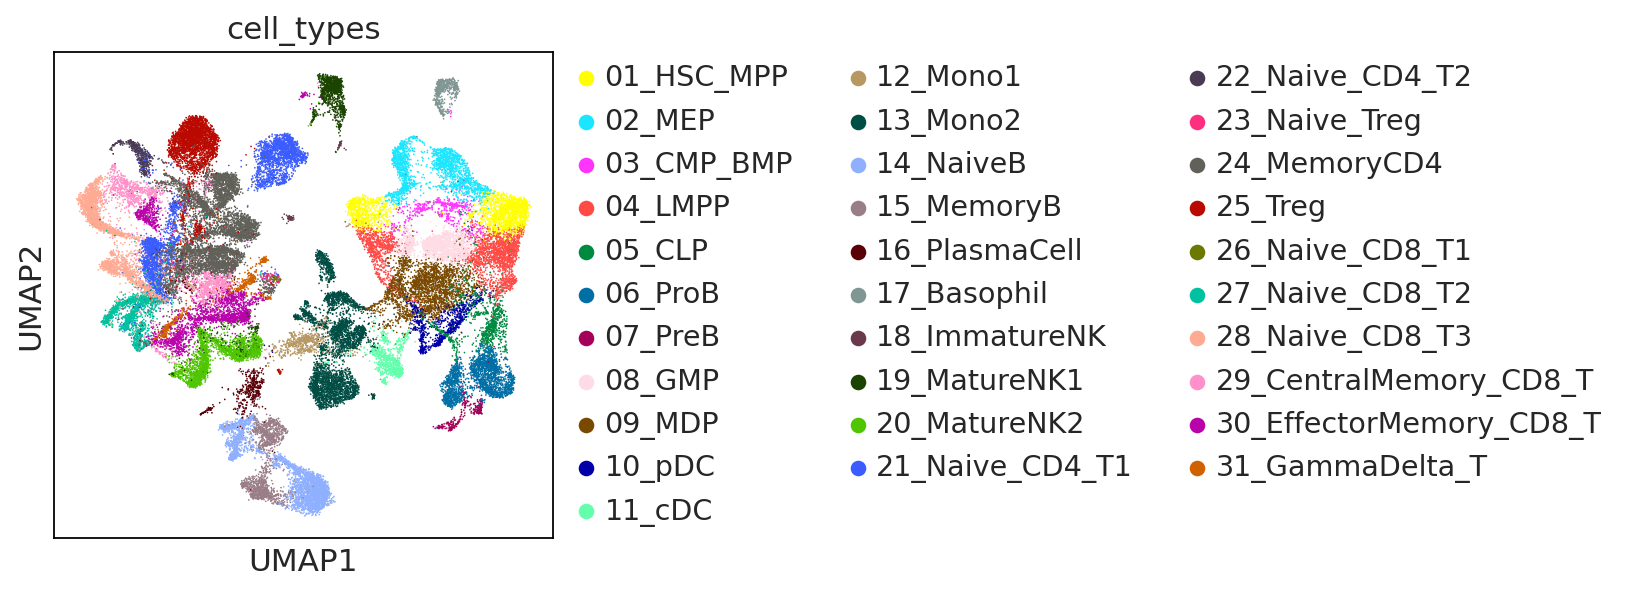

In [174]:
sc.pl.umap(adata1, color=['GSM_id'])
sc.pl.umap(adata1, color=['broad_annot'])
sc.pl.umap(adata1, color=['cell_types'])

In [170]:
#pd.crosstab(adata1.obs['clusters'], adata1.obs['clusters'])

In [171]:
#adata.write(DATADIR+'processed_greenleaf_for_bbknn_integration.h5ad')
adata1.write(DATADIR+'processed_greenleaf_for_bbknn_integration_log1p.h5ad')